In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import utils
%matplotlib inline

In [2]:
from pandas import read_excel
my_sheet = 'Year 2009-2010' 
file_name = 'online_retail_II.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525460,538171,21931,JUMBO STORAGE BAG SUKI,2,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [5]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [10]:
#df['Description'] = df['Description'].str.strip()
#df


df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['Invoice'], inplace=True)
df['Invoice'] = df['Invoice'].astype('str')
df = df[~df['Invoice'].str.contains('C')]
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [11]:
#Groupping the selectected country by Invoice, description and checking it against quantity
df_groupped = (df[df['Country']== 'Norway'].groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Invoice'))
df_groupped

Description,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,3D STICKERS TRADITIONAL CHRISTMAS,4 TRADITIONAL SPINNING TOPS,60 CAKE CASES DOLLY GIRL DESIGN,60 TEATIME FAIRY CAKE CASES,72 CAKE CASES DOLLY GIRL DESIGN,72 CAKE CASES VINTAGE CHRISTMAS,...,TRAVEL SEWING KIT,VINTAGE CREAM CAT FOOD CONTAINER,VINTAGE HEADS AND TAILS CARD GAME,VINTAGE SNAKES & LADDERS,WHITE SKULL HOT WATER BOTTLE,WOODEN ADVENT CALENDAR CREAM,WOODEN BOX OF DOMINOES,WOODEN SCHOOL COLOURING SET,WORLD WAR 2 GLIDERS ASSTD DESIGNS,YOU'RE CONFUSING ME METAL SIGN
Invoice,,,,,,,,,,,,,,,,,,,,,
490718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
519735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
522651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,12.0,4.0,0.0,0.0,12.0,0.0,48.0,0.0
530588,0.0,0.0,24.0,0.0,100.0,0.0,0.0,48.0,48.0,48.0,...,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0
530966,0.0,0.0,0.0,0.0,0.0,12.0,24.0,0.0,0.0,0.0,...,30.0,0.0,24.0,8.0,8.0,0.0,24.0,0.0,0.0,12.0
532430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
535838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Top 10 Description')

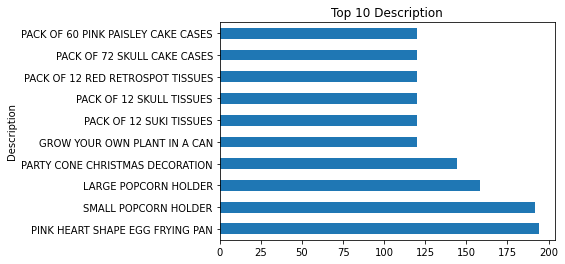

In [12]:
#Plot of Top 10 Description
df_groupped.sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Description")

In [13]:
#Encoding the quantities to equal 0 and 1

def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1
df_set = df_groupped.applymap(encode_units)
df_set.drop('POSTAGE', inplace=True, axis=1)
df_set

Description,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,36 DOILIES DOLLY GIRL,36 FOIL HEART CAKE CASES,3D STICKERS TRADITIONAL CHRISTMAS,4 TRADITIONAL SPINNING TOPS,60 CAKE CASES DOLLY GIRL DESIGN,60 TEATIME FAIRY CAKE CASES,72 CAKE CASES DOLLY GIRL DESIGN,72 CAKE CASES VINTAGE CHRISTMAS,...,TRAVEL SEWING KIT,VINTAGE CREAM CAT FOOD CONTAINER,VINTAGE HEADS AND TAILS CARD GAME,VINTAGE SNAKES & LADDERS,WHITE SKULL HOT WATER BOTTLE,WOODEN ADVENT CALENDAR CREAM,WOODEN BOX OF DOMINOES,WOODEN SCHOOL COLOURING SET,WORLD WAR 2 GLIDERS ASSTD DESIGNS,YOU'RE CONFUSING ME METAL SIGN
Invoice,,,,,,,,,,,,,,,,,,,,,
490718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
519735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
522651,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
530588,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
530966,0,0,0,0,0,1,1,0,0,0,...,1,0,1,1,1,0,1,0,0,1
532430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535838,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
#Association rules

Rules = list(apriori(df_set, min_support=0.7, min_confidence=0.5))
associationRules = utils.extract(Rules)
df_rules = pd.DataFrame(associationRules, columns = ['LHS','RHS','Support','Confidence','Lift'])
df_rules.head()

,LHS,RHS,Support,Confidence,Lift
0,[],[ ],0.995495,0.995495,1.0
1,[],[A],0.918919,0.918919,1.0
2,[],[E],0.914414,0.914414,1.0
3,[],[I],0.846847,0.846847,1.0
4,[],[N],0.720721,0.720721,1.0


In [15]:
utils.inspect(associationRules)

The number of associated rules: 209
LHS: [] --> RHS:[' '], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['A'], support: 0.92, confidence: 0.92, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['E'], support: 0.91, confidence: 0.91, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['I'], support: 0.85, confidence: 0.85, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['N'], support: 0.72, confidence: 0.72, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['O'], support: 0.79, confidence: 0.79, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['R'], support: 0.83, confidence: 0.83, lift: 1.00
---------

In [16]:
listRules = [list(Rules[i][0]) for i in range(0,len(Rules))]

In [17]:
listRules

[[' '],
 ['A'],
 ['E'],
 ['I'],
 ['N'],
 ['O'],
 ['R'],
 ['S'],
 ['T'],
 ['A', ' '],
 ['E', ' '],
 ['I', ' '],
 ['N', ' '],
 ['O', ' '],
 ['R', ' '],
 ['S', ' '],
 ['T', ' '],
 ['E', 'A'],
 ['I', 'A'],
 ['A', 'O'],
 ['A', 'R'],
 ['A', 'S'],
 ['I', 'E'],
 ['E', 'O'],
 ['E', 'R'],
 ['E', 'S'],
 ['I', 'R'],
 ['I', 'S'],
 ['E', 'A', ' '],
 ['I', 'A', ' '],
 ['A', 'O', ' '],
 ['A', 'R', ' '],
 ['A', 'S', ' '],
 ['I', 'E', ' '],
 ['E', 'O', ' '],
 ['E', 'R', ' '],
 ['E', 'S', ' '],
 ['I', 'R', ' '],
 ['I', 'S', ' '],
 ['E', 'I', 'A'],
 ['E', 'A', 'R'],
 ['E', 'A', 'S'],
 ['E', 'I', 'A', ' '],
 ['E', 'A', 'R', ' '],
 ['E', 'A', 'S', ' ']]

In [18]:
#Filtering the top 10 rules based on LIFT
df_rules.nlargest(10,"Lift")

,LHS,RHS,Support,Confidence,Lift
58,[E],[S],0.797297,0.871921,1.046305
59,[S],[E],0.797297,0.956757,1.046305
124,[E],"[ , S]",0.797297,0.871921,1.046305
125,[S],"[E, ]",0.797297,0.956757,1.046305
126,"[E, ]",[S],0.797297,0.871921,1.046305
127,"[S, ]",[E],0.797297,0.956757,1.046305
160,[S],"[E, A]",0.734234,0.881081,1.045989
161,"[E, A]",[S],0.734234,0.871658,1.045989
198,[S],"[E, A, ]",0.734234,0.881081,1.045989
201,"[S, ]","[E, A]",0.734234,0.881081,1.045989


In [19]:
#Filtering the top 10 rules based on SUPPORT
df_rules.nlargest(10,"Support")

,LHS,RHS,Support,Confidence,Lift
0,[],[ ],0.995495,0.995495,1.000000
1,[],[A],0.918919,0.918919,1.000000
9,[],"[A, ]",0.918919,0.918919,1.000000
10,[ ],[A],0.918919,0.923077,1.004525
11,[A],[ ],0.918919,1.000000,1.004525
2,[],[E],0.914414,0.914414,1.000000
12,[],"[E, ]",0.914414,0.914414,1.000000
13,[ ],[E],0.914414,0.918552,1.004525
14,[E],[ ],0.914414,1.000000,1.004525
3,[],[I],0.846847,0.846847,1.000000


In [20]:
#Filtering the top 10 rules based on CONFIDENCE

df_rules.nlargest(10,"Confidence")

,LHS,RHS,Support,Confidence,Lift
11,[A],[ ],0.918919,1.0,1.004525
14,[E],[ ],0.914414,1.0,1.004525
17,[I],[ ],0.846847,1.0,1.004525
20,[N],[ ],0.720721,1.0,1.004525
23,[O],[ ],0.788288,1.0,1.004525
26,[R],[ ],0.833333,1.0,1.004525
29,[S],[ ],0.833333,1.0,1.004525
32,[T],[ ],0.752252,1.0,1.004525
72,"[E, A]",[ ],0.842342,1.0,1.004525
79,"[I, A]",[ ],0.779279,1.0,1.004525


In [21]:
df_rules[df_rules['LHS'].apply(lambda x: len(x)>0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
10,[ ],[A],0.918919,0.923077,1.004525
11,[A],[ ],0.918919,1.000000,1.004525
13,[ ],[E],0.914414,0.918552,1.004525
14,[E],[ ],0.914414,1.000000,1.004525
16,[ ],[I],0.846847,0.850679,1.004525
17,[I],[ ],0.846847,1.000000,1.004525
34,[A],[E],0.842342,0.916667,1.002463
35,[E],[A],0.842342,0.921182,1.002463
67,[ ],"[E, A]",0.842342,0.846154,1.004525
68,[A],"[E, ]",0.842342,0.916667,1.002463


In [22]:
Rules = list(apriori(df_set, min_support=0.07, min_confidence=0.5, max_length=3))
associationRules = utils.extract(Rules)
df_rules = pd.DataFrame(associationRules, columns = ['LHS','RHS','Support','Confidence','Lift'])
df_rules.head()

,LHS,RHS,Support,Confidence,Lift
0,[],[ ],0.995495,0.995495,1.0
1,[],[A],0.918919,0.918919,1.0
2,[],[C],0.662162,0.662162,1.0
3,[],[D],0.603604,0.603604,1.0
4,[],[E],0.914414,0.914414,1.0


In [23]:
utils.inspect(associationRules)

The number of associated rules: 4614
LHS: [] --> RHS:[' '], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['A'], support: 0.92, confidence: 0.92, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['C'], support: 0.66, confidence: 0.66, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['D'], support: 0.60, confidence: 0.60, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['E'], support: 0.91, confidence: 0.91, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['G'], support: 0.53, confidence: 0.53, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['I'], support: 0.85, confidence: 0.85, lift: 1.00
--------

--------------------------------------------------------------------------------
LHS: ['Y', 'R'] --> RHS:[' '], support: 0.27, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:[' ', 'T', 'S'], support: 0.64, confidence: 0.64, lift: 1.00
--------------------------------------------------------------------------------
LHS: [' '] --> RHS:['T', 'S'], support: 0.64, confidence: 0.64, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['S'] --> RHS:[' ', 'T'], support: 0.64, confidence: 0.77, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['T'] --> RHS:[' ', 'S'], support: 0.64, confidence: 0.85, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['S', ' '] --> RHS:['T'], support: 0.64, confidence: 0.77, lift: 1.02
--------------------------------------------------------------

--------------------------------------------------------------------------------
LHS: ['C', 'G'] --> RHS:['M'], support: 0.22, confidence: 0.60, lift: 1.28
--------------------------------------------------------------------------------
LHS: ['C', 'M'] --> RHS:['G'], support: 0.22, confidence: 0.73, lift: 1.37
--------------------------------------------------------------------------------
LHS: ['M', 'G'] --> RHS:['C'], support: 0.22, confidence: 0.68, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['G'] --> RHS:['C', 'N'], support: 0.32, confidence: 0.59, lift: 1.23
--------------------------------------------------------------------------------
LHS: ['C', 'G'] --> RHS:['N'], support: 0.32, confidence: 0.88, lift: 1.21
--------------------------------------------------------------------------------
LHS: ['C', 'N'] --> RHS:['G'], support: 0.32, confidence: 0.65, lift: 1.23
----------------------------------------------------------------

LHS: ['M', 'G'] --> RHS:['O'], support: 0.24, confidence: 0.76, lift: 0.96
--------------------------------------------------------------------------------
LHS: ['O', 'G'] --> RHS:['M'], support: 0.24, confidence: 0.60, lift: 1.28
--------------------------------------------------------------------------------
LHS: ['M', 'O'] --> RHS:['G'], support: 0.24, confidence: 0.67, lift: 1.25
--------------------------------------------------------------------------------
LHS: ['M'] --> RHS:['G', 'R'], support: 0.26, confidence: 0.55, lift: 1.23
--------------------------------------------------------------------------------
LHS: ['M', 'G'] --> RHS:['R'], support: 0.26, confidence: 0.80, lift: 0.96
--------------------------------------------------------------------------------
LHS: ['G', 'R'] --> RHS:['M'], support: 0.26, confidence: 0.58, lift: 1.23
--------------------------------------------------------------------------------
LHS: ['M', 'R'] --> RHS:['G'], support: 0.26, confidence: 0.65, 

In [24]:
df_rules.nlargest(10,"Lift")

,LHS,RHS,Support,Confidence,Lift
1302,[2],"[K, F]",0.076577,0.708333,4.492857
1326,[2],"[K, P]",0.076577,0.708333,3.744048
1263,[2],"[C, F]",0.076577,0.708333,3.345745
1264,"[2, C]",[F],0.076577,0.850000,3.198305
1304,"[K, 2]",[F],0.076577,0.809524,3.046005
1308,[2],"[F, S]",0.076577,0.708333,3.024038
1305,[2],"[F, O]",0.072072,0.666667,2.960000
2245,[X],"[B, O]",0.090090,0.952381,2.896282
1307,"[2, O]",[F],0.072072,0.761905,2.866828
1269,[2],"[K, C]",0.090090,0.833333,2.846154


In [25]:
df_rules[df_rules['LHS'].apply(lambda x: len(x)>0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
16,[ ],[A],0.918919,0.923077,1.004525
17,[A],[ ],0.918919,1.000000,1.004525
26,[ ],[E],0.914414,0.918552,1.004525
27,[E],[ ],0.914414,1.000000,1.004525
34,[ ],[I],0.846847,0.850679,1.004525
35,[I],[ ],0.846847,1.000000,1.004525
83,[A],[E],0.842342,0.916667,1.002463
84,[E],[A],0.842342,0.921182,1.002463
430,[ ],"[E, A]",0.842342,0.846154,1.004525
431,[A],"[E, ]",0.842342,0.916667,1.002463


In [26]:
df_rules.nlargest(10,'Confidence')

,LHS,RHS,Support,Confidence,Lift
13,[2],[ ],0.108108,1.0,1.004525
14,[6],[ ],0.072072,1.0,1.004525
17,[A],[ ],0.918919,1.0,1.004525
18,[B],[ ],0.387387,1.0,1.004525
21,[C],[ ],0.662162,1.0,1.004525
24,[D],[ ],0.603604,1.0,1.004525
27,[E],[ ],0.914414,1.0,1.004525
28,[F],[ ],0.265766,1.0,1.004525
31,[G],[ ],0.531532,1.0,1.004525
32,[H],[ ],0.382883,1.0,1.004525


In [27]:
Rules = list(apriori(df_set, min_support=0.07, min_confidence=0.05, max_length=3))
associationRules = utils.extract(Rules)
df_rules = pd.DataFrame(associationRules, columns = ['LHS','RHS','Support','Confidence','Lift'])
utils.inspect(associationRules)

#WHITE HANGING HEART T-LIGHT HOLDER

The number of associated rules: 11203
LHS: [] --> RHS:[' '], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['2'], support: 0.11, confidence: 0.11, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['6'], support: 0.07, confidence: 0.07, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['A'], support: 0.92, confidence: 0.92, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['B'], support: 0.39, confidence: 0.39, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['C'], support: 0.66, confidence: 0.66, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['D'], support: 0.60, confidence: 0.60, lift: 1.00
-------

LHS: ['B', ' '] --> RHS:['D'], support: 0.21, confidence: 0.55, lift: 0.91
--------------------------------------------------------------------------------
LHS: ['D', ' '] --> RHS:['B'], support: 0.21, confidence: 0.35, lift: 0.91
--------------------------------------------------------------------------------
LHS: ['B', 'D'] --> RHS:[' '], support: 0.21, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['B', 'E', ' '], support: 0.36, confidence: 0.36, lift: 1.00
--------------------------------------------------------------------------------
LHS: [' '] --> RHS:['B', 'E'], support: 0.36, confidence: 0.36, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['B'] --> RHS:['E', ' '], support: 0.36, confidence: 0.93, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['E'] --> RHS:['B', ' '], support: 0.36, confidence: 0.39

--------------------------------------------------------------------------------
LHS: [' '] --> RHS:['P', 'T'], support: 0.34, confidence: 0.34, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['P'] --> RHS:[' ', 'T'], support: 0.34, confidence: 0.77, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['T'] --> RHS:['P', ' '], support: 0.34, confidence: 0.46, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['P', ' '] --> RHS:['T'], support: 0.34, confidence: 0.77, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['T', ' '] --> RHS:['P'], support: 0.34, confidence: 0.46, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['P', 'T'] --> RHS:[' '], support: 0.34, confidence: 1.00, lift: 1.00
----------------------------------------------------------------

--------------------------------------------------------------------------------
LHS: ['K', 'A'] --> RHS:['I'], support: 0.32, confidence: 0.84, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['K', 'I'] --> RHS:['A'], support: 0.32, confidence: 0.95, lift: 1.03
--------------------------------------------------------------------------------
LHS: [] --> RHS:['I', 'L', 'A'], support: 0.50, confidence: 0.50, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['A'] --> RHS:['I', 'L'], support: 0.50, confidence: 0.55, lift: 1.02
--------------------------------------------------------------------------------
LHS: ['I'] --> RHS:['L', 'A'], support: 0.50, confidence: 0.60, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['L'] --> RHS:['I', 'A'], support: 0.50, confidence: 0.79, lift: 1.02
--------------------------------------------------------------

LHS: ['B'] --> RHS:['K', 'S'], support: 0.12, confidence: 0.31, lift: 0.93
--------------------------------------------------------------------------------
LHS: ['K'] --> RHS:['B', 'S'], support: 0.12, confidence: 0.31, lift: 1.01
--------------------------------------------------------------------------------
LHS: ['S'] --> RHS:['K', 'B'], support: 0.12, confidence: 0.15, lift: 0.93
--------------------------------------------------------------------------------
LHS: ['K', 'B'] --> RHS:['S'], support: 0.12, confidence: 0.77, lift: 0.93
--------------------------------------------------------------------------------
LHS: ['B', 'S'] --> RHS:['K'], support: 0.12, confidence: 0.40, lift: 1.01
--------------------------------------------------------------------------------
LHS: ['K', 'S'] --> RHS:['B'], support: 0.12, confidence: 0.36, lift: 0.93
--------------------------------------------------------------------------------
LHS: [] --> RHS:['K', 'B', 'T'], support: 0.11, confidence: 0.11

LHS: [] --> RHS:['L', 'C', 'P'], support: 0.17, confidence: 0.17, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['C'] --> RHS:['L', 'P'], support: 0.17, confidence: 0.25, lift: 0.95
--------------------------------------------------------------------------------
LHS: ['L'] --> RHS:['P', 'C'], support: 0.17, confidence: 0.26, lift: 0.88
--------------------------------------------------------------------------------
LHS: ['P'] --> RHS:['L', 'C'], support: 0.17, confidence: 0.37, lift: 0.92
--------------------------------------------------------------------------------
LHS: ['L', 'C'] --> RHS:['P'], support: 0.17, confidence: 0.41, lift: 0.92
--------------------------------------------------------------------------------
LHS: ['P', 'C'] --> RHS:['L'], support: 0.17, confidence: 0.56, lift: 0.88
--------------------------------------------------------------------------------
LHS: ['L', 'P'] --> RHS:['C'], support: 0.17, confidence: 0.63

--------------------------------------------------------------------------------
LHS: ['F', 'E'] --> RHS:['R'], support: 0.17, confidence: 0.70, lift: 0.84
--------------------------------------------------------------------------------
LHS: ['E', 'R'] --> RHS:['F'], support: 0.17, confidence: 0.22, lift: 0.84
--------------------------------------------------------------------------------
LHS: ['F', 'R'] --> RHS:['E'], support: 0.17, confidence: 0.90, lift: 0.99
--------------------------------------------------------------------------------
LHS: [] --> RHS:['E', 'F', 'S'], support: 0.22, confidence: 0.22, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['E'] --> RHS:['F', 'S'], support: 0.22, confidence: 0.24, lift: 1.03
--------------------------------------------------------------------------------
LHS: ['F'] --> RHS:['E', 'S'], support: 0.22, confidence: 0.83, lift: 1.04
--------------------------------------------------------------

--------------------------------------------------------------------------------
LHS: ['F'] --> RHS:['U', 'T'], support: 0.09, confidence: 0.34, lift: 1.25
--------------------------------------------------------------------------------
LHS: ['T'] --> RHS:['F', 'U'], support: 0.09, confidence: 0.12, lift: 0.95
--------------------------------------------------------------------------------
LHS: ['U'] --> RHS:['F', 'T'], support: 0.09, confidence: 0.24, lift: 1.29
--------------------------------------------------------------------------------
LHS: ['F', 'T'] --> RHS:['U'], support: 0.09, confidence: 0.48, lift: 1.29
--------------------------------------------------------------------------------
LHS: ['F', 'U'] --> RHS:['T'], support: 0.09, confidence: 0.71, lift: 0.95
--------------------------------------------------------------------------------
LHS: ['U', 'T'] --> RHS:['F'], support: 0.09, confidence: 0.33, lift: 1.25
----------------------------------------------------------------

LHS: ['I', 'N'] --> RHS:['R'], support: 0.54, confidence: 0.82, lift: 0.99
--------------------------------------------------------------------------------
LHS: ['I', 'R'] --> RHS:['N'], support: 0.54, confidence: 0.77, lift: 1.07
--------------------------------------------------------------------------------
LHS: ['N', 'R'] --> RHS:['I'], support: 0.54, confidence: 0.90, lift: 1.07
--------------------------------------------------------------------------------
LHS: [] --> RHS:['I', 'N', 'S'], support: 0.54, confidence: 0.54, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['I'] --> RHS:['N', 'S'], support: 0.54, confidence: 0.63, lift: 1.09
--------------------------------------------------------------------------------
LHS: ['N'] --> RHS:['I', 'S'], support: 0.54, confidence: 0.74, lift: 1.05
--------------------------------------------------------------------------------
LHS: ['S'] --> RHS:['I', 'N'], support: 0.54, confidence: 0.64

LHS: ['N'] --> RHS:['T', 'V'], support: 0.08, confidence: 0.11, lift: 1.25
--------------------------------------------------------------------------------
LHS: ['T'] --> RHS:['N', 'V'], support: 0.08, confidence: 0.11, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['V'] --> RHS:['N', 'T'], support: 0.08, confidence: 0.78, lift: 1.48
--------------------------------------------------------------------------------
LHS: ['N', 'T'] --> RHS:['V'], support: 0.08, confidence: 0.15, lift: 1.48
--------------------------------------------------------------------------------
LHS: ['N', 'V'] --> RHS:['T'], support: 0.08, confidence: 0.90, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['V', 'T'] --> RHS:['N'], support: 0.08, confidence: 0.90, lift: 1.25
--------------------------------------------------------------------------------
LHS: [] --> RHS:['N', 'W', 'T'], support: 0.15, confidence: 0.15

In [28]:
pip install plotly==5.10.0

Note: you may need to restart the kernel to use updated packages.


In [1]:
df_rules = pd.DataFrame(associationRules, columns=['LHS','RHS','Support','Confidence','Lift'])
import plotly.express as px
fig = px.scatter(df_rules, x='Support',y='Confidence',color='Lift',hover_data=['LHS','RHS'], color_continuous_scale='agsunset')
fig.show()

NameError: name 'pd' is not defined